### Sebastián Rodríguez
### 20003076

# Proyecto 1 - FeedForward/MLP


Para este proyecto se decidió utilizar un dataset de reseñas de TripAdvisor sobre las estadías en hoteles de las Vegas. https://www.kaggle.com/search?q=las+vegas+in%3Adatasets La idea principal es asociar la puntuación del review en base los parámetros que nos brinda el dataset. 

Se utilizó pre processing par amanejar la data y asociar las variables más destacadas con el fin de asociarlas por medio de un algoritmos Feed Forward. 

In [59]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
df = pd.read_csv('Las_Vegas_TripAdvisor.csv')
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [4]:
display(df.describe(include=[np.number]))
display(df.describe(exclude=[np.number]))

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.844650,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
count,504,504,504,504,504,504,504,504,504,504,504,504,504
unique,48,4,5,2,2,2,2,2,2,21,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Circus Circus Hotel & Casino Las Vegas,North America,May,Wednesday
freq,217,128,214,480,480,384,384,456,480,24,295,42,85


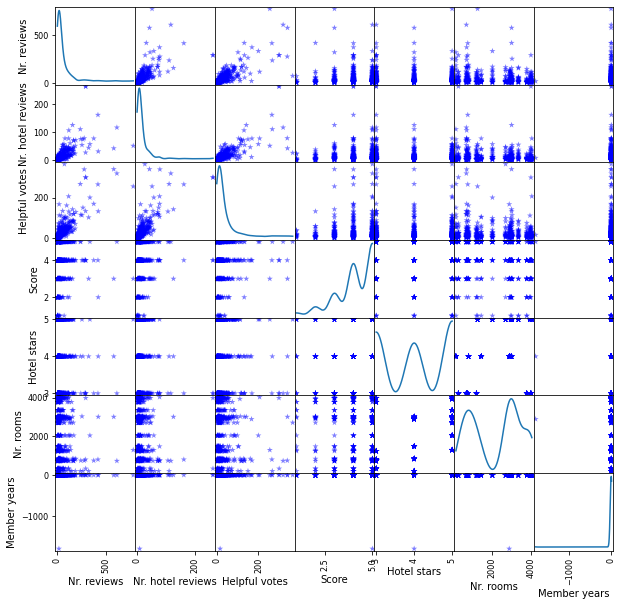

In [5]:
pd.plotting.scatter_matrix(df,figsize=(10,10), diagonal='kde',s=40,alpha=0.5,marker='*',color='blue');

### Experimentos para categorizar 

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical = list(df.select_dtypes(include=['object']).columns.values)

['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
df['Period of stay'] = df['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  data[categorical[i]] = le.fit_transform(data[categorical[i]])
    print(df[categorical[i]].unique())

['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
[nan]
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn 

In [9]:
for i in range(0, len(categorical)):
    df[categorical[i]] = le.fit_transform(df[categorical[i]])
    
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,46,11,4,13,5,0,3,0,1,0,0,1,1,2,3,3773,3,9,4,4
1,46,119,21,75,3,0,0,0,1,0,0,1,1,2,3,3773,3,3,4,0
2,46,36,9,25,5,0,2,0,1,0,0,1,1,2,3,3773,3,2,3,2
3,45,14,7,14,4,0,3,0,1,0,0,1,1,2,3,3773,2,6,3,0
4,3,5,5,2,4,0,4,0,1,0,0,1,1,2,3,3773,3,7,7,5


In [10]:
# Creamos una copia del dataframe para modificar sobre este
df1 = df[df["Score"] <= 1000].copy()

In [11]:
df1.sort_values(by='Score', ascending=True, inplace=True)
print("Número de observaciones: ", len(df1))
df1.head()

Número de observaciones:  504


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
131,46,25,22,36,1,0,4,1,1,0,1,1,1,1,5,3348,3,9,6,5
69,4,1,0,2,1,0,0,1,1,0,1,1,0,8,4,3003,1,0,9,6
264,44,3,3,20,1,0,0,1,1,0,1,1,1,3,5,2034,1,5,4,5
112,3,27,0,9,1,0,1,1,1,1,1,1,1,16,4,1467,3,0,11,5
253,46,4,0,16,1,0,3,1,0,0,0,1,1,11,4,188,3,0,5,4


In [15]:
# Experimentar únicamente sobre 3 variables, pero sin buenos resultados 
#regressors = ['User country', 'Nr. reviews','Nr. hotel reviews']

regressors = ['User country', 'Nr. reviews','Nr. hotel reviews','Helpful votes',
              'Traveler type','Pool','Gym',
              'Free internet','Spa']

X = df1[regressors]
y = df1['Score']

In [16]:
print("Máximo valor de score: ", y.max())

Máximo valor de score:  5


In [17]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

(504, 9)


# Separación de datos y Modelo

Creamos nuestra red con activaciones relu, se ha probado cambiar las funciones de activación para mejorar las salidas en las funciones de costo, pero no ha mejorado mucho del 12 por ciento que hemos obtenido como màximo. Se realizó un experimento para cambiar las variables de mayor correlación sin éxito. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
X_train.shape, X_test.shape

((403, 9), (101, 9))

In [54]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compilar el modelo 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 4         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, 
                    epochs=100, validation_split=0.2, 
                    batch_size=1024, verbose=1,
                    callbacks=[es])

Epoch 1/100
1/1 [==============================] - 0s 100ms/step - loss: 16.6453 - val_loss: 16.7609
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 16.5905 - val_loss: 16.7091
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 16.5354 - val_loss: 16.6571
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 16.4802 - val_loss: 16.6047
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 16.4248 - val_loss: 16.5520
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 16.3691 - val_loss: 16.4986
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 16.3131 - val_loss: 16.4445
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 16.2570 - val_loss: 16.3898
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 16.2007 - val_loss: 16.3350
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 16.1441 - val_loss: 16.279

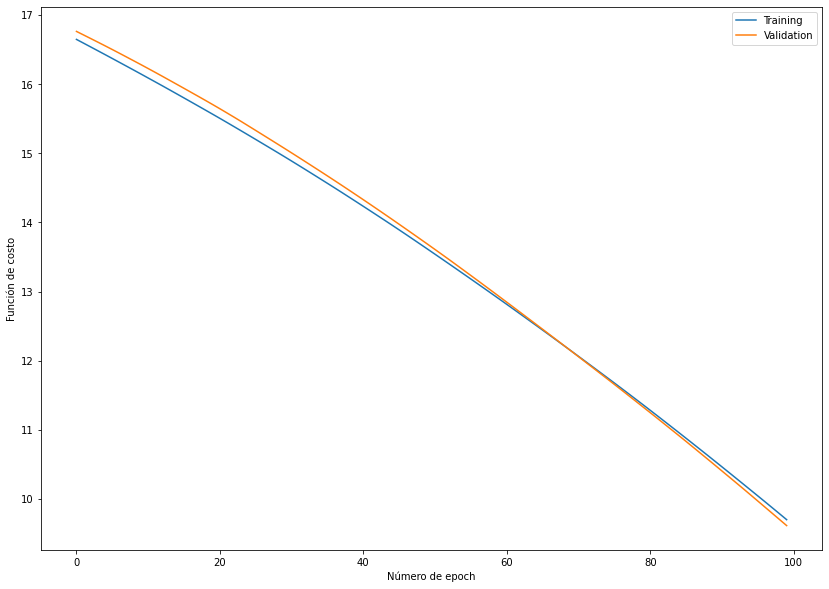

In [56]:
plt.figure(figsize=(14,10))
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.xlabel("Número de epoch")
plt.ylabel("Función de costo")
plt.legend();

In [57]:
predicts = model.predict(X_test)

### Observaciones

Notamos una deficiencia en el modelo el cual se trabajó con diferentes modelos para realizar una mejora con el feed forward, pero no mejora en comparación del mostrado. Podríamos asumir que existen problemas con los parámetros seleccionados para realizar la predicción. 

In [58]:
from sklearn import metrics

print("RMSE= %0.4f, R^2 = %0.2f" % (np.sqrt(metrics.mean_squared_error(y_test, predicts)), 
                                   r2_score(y_test, predicts)))

RMSE= 2.9229, R^2 = -8.05


# Conclusión

Podemos asumir que existen diferentes parámetros que pudimos haber elegido para mejorar la función de costo que tenemos. Considero que si tomamos el set de parámetros completos podemos mejorar enormemente la predicciòn que nos brinda el modelo, pero sacrificamos eficiencia computacional.

Posiblemente haber implementado un back propagation nos pudo haber beneficiado para este problema.